In [1]:
from data_processing import *
from train import *

In [2]:
data = Dataset("set1_imu.csv", "set1_tab.csv")
data.data_set.head()

<class 'pandas.core.frame.DataFrame'>
merging the data sets...
calculate the quaternion representations...
calculate the rotation matrices...
calculate the navigation frame representation...
integrate the acceleration...


,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,x,...,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
0,43375070723400,733964,-0.634824,0.466391,0.584305,-0.686517,0.11501,0.06939,20.29,-125.0,...,"[[-0.11382636407015201, 0.3750248547647836, -0...",-0.290393,0.418746,0.838008,0.000000,0.000000,0.000000,-125.000000,727.000000,0.000000
1,43375082694400,733975,-0.624188,0.485592,0.616692,-0.383517,0.17861,0.16839,20.29,-125.0,...,"[[0.40367173193477623, -0.9091483282409087, 0....",-0.630255,0.604797,0.492665,-5.063563,5.629486,7.318703,-152.849595,757.962173,40.252865
2,43375093727500,733986,-0.652059,0.487532,0.576429,-0.221017,0.29831,0.27589,20.29,-125.0,...,"[[-0.3519163621500252, 0.8038031677093032, 0.4...",0.897829,0.402963,0.163287,-3.591903,11.172164,10.926440,-200.454658,850.371246,140.601148
3,43375104950600,733998,-0.622237,0.512819,0.557383,0.168683,0.37521,0.49819,20.29,-125.0,...,"[[-0.4890386249033041, -0.825427834650935, 0.2...",0.038171,0.216470,0.955260,2.024098,14.888762,17.637719,-209.861488,1006.736800,311.986101
4,43375116785300,734009,-0.613073,0.566541,0.545624,0.397183,0.34961,0.54099,20.25,-125.0,...,"[[0.07391306177843293, 0.5203295300117495, 0.8...",0.713670,0.691190,-0.086401,6.159223,19.880890,22.416440,-164.853221,1197.969884,532.283972


Split into test and trainings data...
(60136, 31) <class 'pandas.core.frame.DataFrame'>
Create segments and labels...
(6013, 10, 6)
Create the LSTM model...
Fitting model...
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Plot the results...


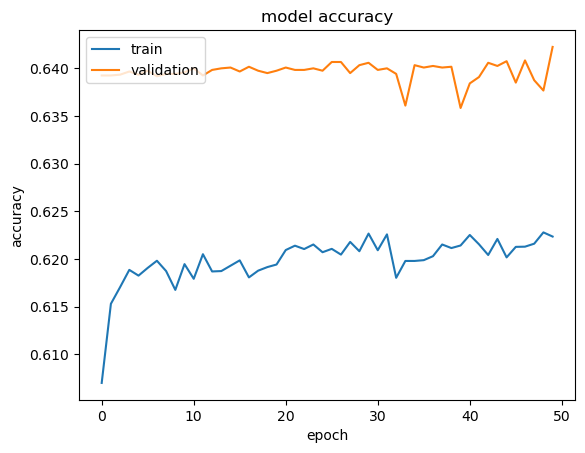

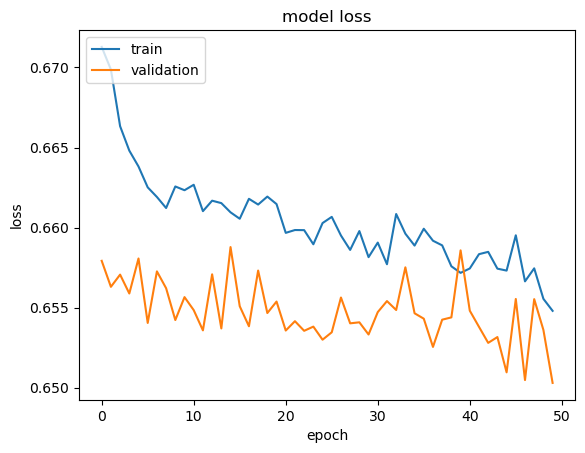

Validation accuracy: [0.6070062518119812, 0.6153014302253723, 0.6170478463172913, 0.6188565492630005, 0.6182536482810974, 0.6190643906593323, 0.6198129653930664, 0.6187317371368408, 0.616756796836853, 0.6194596290588379, 0.617920994758606, 0.6204988956451416, 0.6186903715133667, 0.6187319159507751, 0.6192932724952698, 0.6198544502258301, 0.6180666089057922, 0.6187734007835388, 0.6191476583480835, 0.6194179058074951, 0.6209356188774109, 0.6213929057121277, 0.6210394501686096, 0.6215177178382874, 0.6207068562507629, 0.6210602521896362, 0.6204574108123779, 0.6217880249023438, 0.6208109259605408, 0.6226611733436584, 0.6209146976470947, 0.6225779056549072, 0.6180249452590942, 0.619792103767395, 0.6197920441627502, 0.6198752522468567, 0.620290994644165, 0.6215175986289978, 0.6211434006690979, 0.6214138269424438, 0.6225155591964722, 0.6215384602546692, 0.6204158663749695, 0.6220998764038086, 0.6201663017272949, 0.6212681531906128, 0.621289074420929, 0.6216008067131042, 0.6227859854698181, 0.6

In [3]:
model = PredictionModel(data.data_set)

In [19]:
for i in range(0, 100-10 , 5): #dataframe 100 lang, will 5 segmente und 10 steps
    print(i, i+10)

0 10
5 15
10 20
15 25
20 30
25 35
30 40
35 45
40 50
45 55
50 60
55 65
60 70
65 75
70 80
75 85
80 90
85 95
